In [11]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [13]:
# import seaborn as sns

In [14]:
os.listdir('./')

['.ipynb_checkpoints',
 '001 INTRO.ipynb',
 '002 - Preprocess.ipynb',
 '003.ipynb',
 'catboost_info',
 'grpd.csv',
 'merged.csv',
 'sample_submission_IIzFVsf.csv',
 'test.csv',
 'test_1eLl9Yf.csv',
 'train.csv',
 'train_fwYjLYX.csv']

In [15]:
train = pd.read_csv('./train_fwYjLYX.csv')

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [7]:
#train = train[train['segment'] == 2]
#t1

In [8]:
grpd = train.groupby(['application_date' , 'segment'],as_index = False).sum()
grpd['day'] = train.apply(lambda x : pd.to_datetime(x['application_date']).weekday() , axis = 1)

In [10]:
grpd.head()

,application_date,segment,branch_id,case_count,day
0,2017-04-01,1,9863.0,299.0,5
1,2017-04-01,2,0.0,897.0,0
2,2017-04-02,2,0.0,605.0,1
3,2017-04-03,1,9863.0,42.0,2
4,2017-04-03,2,0.0,2016.0,4


In [101]:
grpd.to_csv('./grpd.csv')

In [69]:
train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


## Training only for segment 1

In [70]:
#train = train[train['segment'] == 2]

In [71]:
t = train[:100]
train['day'] = train.apply(lambda x : pd.to_datetime(x['application_date']).weekday() , axis = 1)
train['sz'] = train['state'].astype(str) + train['zone'].astype(str)
train = train.drop(['state' , 'zone'] ,axis = 1)

## Mean encodings

In [72]:
def mean_encodings(df , cols) :
    for col in cols :
        df['{}_enc'.format(col)] = df.groupby(col)['case_count'].transform('mean')
        #df['{}_enc'.format(col)].fillna(0.4453, inplace=True)
    return df

cols = [ 'sz' , 'branch_id' , 'day' , 'segment']
#cols = [ 'sz', 'day']

train = mean_encodings(train , cols)

train.head()

,application_date,segment,branch_id,case_count,day,sz,sz_enc,branch_id_enc,day_enc,segment_enc
0,2017-04-01,1,1.0,40.0,5,WEST BENGALEAST,52.036911,159.656328,187.348921,32.707106
1,2017-04-03,1,1.0,5.0,0,WEST BENGALEAST,52.036911,159.656328,187.947250,32.707106
2,2017-04-04,1,1.0,4.0,1,WEST BENGALEAST,52.036911,159.656328,197.249654,32.707106
3,2017-04-05,1,1.0,113.0,2,WEST BENGALEAST,52.036911,159.656328,200.408382,32.707106
4,2017-04-07,1,1.0,76.0,4,WEST BENGALEAST,52.036911,159.656328,195.889938,32.707106


In [73]:
train = pd.get_dummies(train, columns=['sz','branch_id' ,'day' , 'segment'])
train.head()

,application_date,case_count,sz_enc,branch_id_enc,day_enc,segment_enc,sz_ANDHRA PRADESHSOUTH,sz_ASSAMEAST,sz_ASSAMnan,sz_BIHAREAST,...,branch_id_271.0,day_0,day_1,day_2,day_3,day_4,day_5,day_6,segment_1,segment_2
0,2017-04-01,40.0,52.036911,159.656328,187.348921,32.707106,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2017-04-03,5.0,52.036911,159.656328,187.947250,32.707106,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,2017-04-04,4.0,52.036911,159.656328,197.249654,32.707106,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,2017-04-05,113.0,52.036911,159.656328,200.408382,32.707106,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2017-04-07,76.0,52.036911,159.656328,195.889938,32.707106,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [79]:
train.head()

,case_count,sz_enc,branch_id_enc,day_enc,segment_enc,sz_ANDHRA PRADESHSOUTH,sz_ASSAMEAST,sz_ASSAMnan,sz_BIHAREAST,sz_BIHARnan,...,branch_id_271.0,day_0,day_1,day_2,day_3,day_4,day_5,day_6,segment_1,segment_2
application_date,,,,,,,,,,,,,,,,,,,,,
2017-04-01,40.0,52.036911,159.656328,187.348921,32.707106,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2017-04-03,5.0,52.036911,159.656328,187.947250,32.707106,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2017-04-04,4.0,52.036911,159.656328,197.249654,32.707106,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2017-04-05,113.0,52.036911,159.656328,200.408382,32.707106,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2017-04-07,76.0,52.036911,159.656328,195.889938,32.707106,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [80]:
#train = train.reset_index()
#train = train.set_index(['application_date'])
# train = train.drop(['day' , 'sz'] , axis = 1)
train.head()

,case_count,sz_enc,branch_id_enc,day_enc,segment_enc,sz_ANDHRA PRADESHSOUTH,sz_ASSAMEAST,sz_ASSAMnan,sz_BIHAREAST,sz_BIHARnan,...,branch_id_271.0,day_0,day_1,day_2,day_3,day_4,day_5,day_6,segment_1,segment_2
application_date,,,,,,,,,,,,,,,,,,,,,
2017-04-01,40.0,52.036911,159.656328,187.348921,32.707106,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2017-04-03,5.0,52.036911,159.656328,187.947250,32.707106,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2017-04-04,4.0,52.036911,159.656328,197.249654,32.707106,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2017-04-05,113.0,52.036911,159.656328,200.408382,32.707106,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2017-04-07,76.0,52.036911,159.656328,195.889938,32.707106,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## Training Seg 2 :

In [81]:
df = train[train.index < '2019-04-01']

In [82]:
val = train[train.index >= '2019-04-01']

In [102]:
val

,case_count,sz_enc,branch_id_enc,day_enc,segment_enc,sz_ANDHRA PRADESHSOUTH,sz_ASSAMEAST,sz_ASSAMnan,sz_BIHAREAST,sz_BIHARnan,...,branch_id_271.0,day_0,day_1,day_2,day_3,day_4,day_5,day_6,segment_1,segment_2
application_date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,0.0,52.036911,159.656328,187.947250,32.707106,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2019-04-02,136.0,52.036911,159.656328,197.249654,32.707106,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2019-04-03,156.0,52.036911,159.656328,200.408382,32.707106,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2019-04-04,149.0,52.036911,159.656328,198.623592,32.707106,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2019-04-05,149.0,52.036911,159.656328,195.889938,32.707106,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2019-04-06,169.0,52.036911,159.656328,187.348921,32.707106,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2019-04-07,158.0,52.036911,159.656328,128.858821,32.707106,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2019-04-08,230.0,52.036911,159.656328,187.947250,32.707106,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2019-04-09,157.0,52.036911,159.656328,197.249654,32.707106,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [83]:
X_train = df.drop(['case_count'] , axis = 1)
y_train = df['case_count'].astype(int)


X_val = val.drop(['case_count'] , axis = 1)
y_val = val['case_count'].astype(int)


In [84]:
categorical = ['sz' , 'branch_id' , 'day' , 'segment']

def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols, query_cols, sorter=sidx)]
categorical_features_indices = column_index(X_train, categorical)

In [85]:
X_train.head()

,sz_enc,branch_id_enc,day_enc,segment_enc,sz_ANDHRA PRADESHSOUTH,sz_ASSAMEAST,sz_ASSAMnan,sz_BIHAREAST,sz_BIHARnan,sz_CHHATTISGARHCENTRAL,...,branch_id_271.0,day_0,day_1,day_2,day_3,day_4,day_5,day_6,segment_1,segment_2
application_date,,,,,,,,,,,,,,,,,,,,,
2017-04-01,52.036911,159.656328,187.348921,32.707106,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2017-04-03,52.036911,159.656328,187.947250,32.707106,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2017-04-04,52.036911,159.656328,197.249654,32.707106,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2017-04-05,52.036911,159.656328,200.408382,32.707106,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2017-04-07,52.036911,159.656328,195.889938,32.707106,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [86]:
#!pip install catboost
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80402 entries, 2017-04-01 to 2019-07-23
Columns: 134 entries, case_count to segment_2
dtypes: float64(5), uint8(129)
memory usage: 13.6+ MB


In [87]:
#train.describe()
from catboost import CatBoostRegressor


In [88]:
model =  CatBoostRegressor(iterations=1500,
                             learning_rate=0.01,
                             depth=16,
                             eval_metric='MAPE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             task_type = "GPU",
                             devices='0:1',
                             
                             od_wait=100)

In [89]:
model.fit(X_train, y_train,
                 eval_set=(X_val, y_val),
                  cat_features=categorical_features_indices,
                 use_best_model=True)

0:	learn: 62.7734953	test: 33.9669373	best: 33.9669373 (0)	total: 223ms	remaining: 5m 34s
75:	learn: 36.6112803	test: 18.1562532	best: 18.1562532 (75)	total: 30s	remaining: 9m 21s
150:	learn: 23.9298081	test: 10.5131980	best: 10.5131980 (150)	total: 56.8s	remaining: 8m 27s
225:	learn: 17.3947245	test: 6.5146022	best: 6.5146022 (225)	total: 1m 24s	remaining: 7m 56s
300:	learn: 14.0590515	test: 4.4976444	best: 4.4976444 (300)	total: 1m 52s	remaining: 7m 26s
375:	learn: 12.2904192	test: 3.4598680	best: 3.4598680 (375)	total: 2m 19s	remaining: 6m 57s
450:	learn: 11.2911300	test: 2.8494590	best: 2.8494590 (450)	total: 2m 48s	remaining: 6m 32s
525:	learn: 10.7115927	test: 2.5047719	best: 2.5047719 (525)	total: 3m 15s	remaining: 6m 1s
600:	learn: 10.3833460	test: 2.3061192	best: 2.3061192 (600)	total: 3m 39s	remaining: 5m 28s
675:	learn: 10.1905529	test: 2.1833835	best: 2.1833835 (675)	total: 4m 6s	remaining: 5m
750:	learn: 10.0635285	test: 2.1040219	best: 2.1040219 (750)	total: 4m 29s	remain

### 1.  Best with only using days : bestTest = 15.47779003

4. Median encodings : 
1499:	learn: 17.6722849	test: 14.5877347	best: 14.5877249 (1497)	total: 9m	remaining: 0us


3. Mean encodings
1499:	learn: 17.6603788	test: 14.5491664	best: 14.5491664 (1499)	total: 9m 21s	remaining: 0us
bestTest = 14.54916639
bestIteration = 1499

2. learn: 17.7973402	test: 14.6429358	best: 14.6429358 (1499)	total: 12m 39s	remaining: 0us



1. 

1499:	learn: 122.2788587	test: 139.5402871	best: 139.5402871 (1499)	total: 9m 18s	remaining: 0us

bestTest = 139.5402871




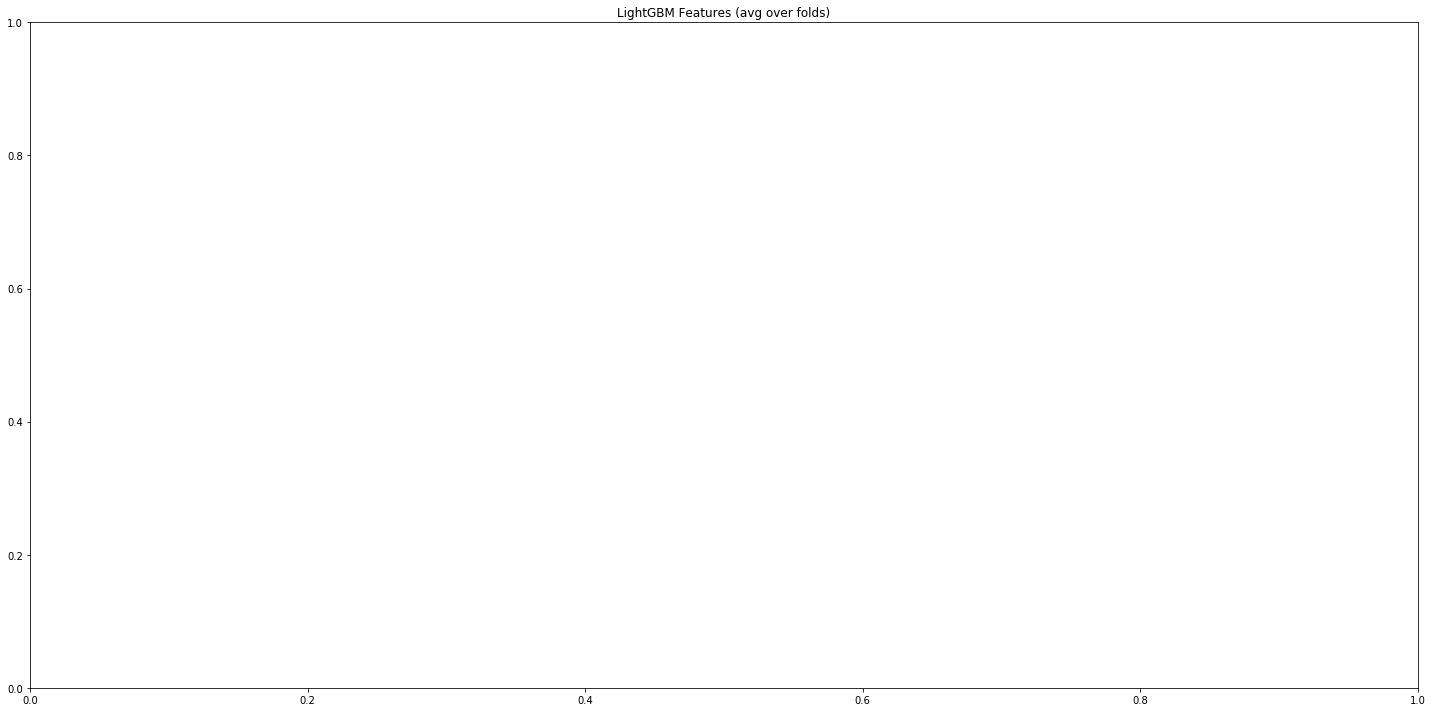

In [22]:
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_train.columns)), columns=['Value','Feature'])


plt.figure(figsize=(20, 10))
try:
    sns.barplot(x="Value", y="Feature", datoga=feature_imp.sort_values(by="Value", ascending=False)[:40])
except :
    x = 1
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [23]:
feature_imp.sort_values(by="Value", ascending=False)[:40]['Feature']

121             branch_id_135.0
120               branch_id_5.0
119               branch_id_1.0
118              branch_id_34.0
117               sz_DELHINORTH
116              branch_id_67.0
115              branch_id_16.0
114              branch_id_19.0
113                         day
112               branch_id_3.0
111             branch_id_136.0
110              branch_id_36.0
109          sz_WEST BENGALEAST
108        sz_UTTAR PRADESHEAST
107              branch_id_61.0
106      sz_ANDHRA PRADESHSOUTH
105              sz_ORISSASOUTH
104          sz_MAHARASHTRAWEST
103             sz_HARYANANORTH
102              branch_id_18.0
101          sz_TAMIL NADUSOUTH
100              branch_id_21.0
99              branch_id_103.0
98               branch_id_74.0
97              branch_id_117.0
96     sz_MADHYA PRADESHCENTRAL
95               branch_id_15.0
94               sz_TRIPURAEAST
93               branch_id_13.0
92              branch_id_266.0
91              branch_id_264.0
90      

In [ ]:
train['sz'].value_counts().head()

## Doing mean encodings

,segment,branch_id,state,zone,case_count,day
application_date,,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,5
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,0
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,1
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,4


### Day & mean for that day can be kept as a feature - be wary of leakage

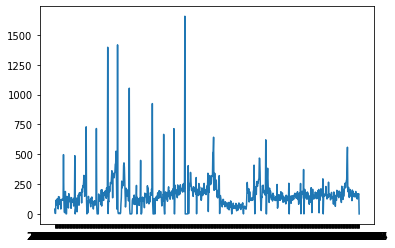

In [98]:
#d = train.loc['2017-05-05']
d = train[train['branch_id'] == 1]
plt.plot(d.index , d['case_count'])

In [112]:
d

,segment,branch_id,state,zone,case_count,day
application_date,,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,5
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,0
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,1
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,4
2017-04-12,1,1.0,WEST BENGAL,EAST,123.0,2
2017-04-13,1,1.0,WEST BENGAL,EAST,81.0,3
2017-04-14,1,1.0,WEST BENGAL,EAST,117.0,4
2017-04-15,1,1.0,WEST BENGAL,EAST,127.0,5


In [96]:
train.groupby(['day']).mean()
#d['application_date']

,segment,branch_id,case_count
day,,,
0,1.167416,118.831325,187.947250
1,1.167416,118.831325,197.249654
2,1.166263,118.831325,200.408382
3,1.165076,118.831325,198.623592
4,1.166263,118.831325,195.889938
5,1.169854,118.831325,187.348921
6,1.173648,118.831325,128.858821


In [60]:
d['day'] = d.apply(lambda x : x.index.to_datetime() ,axis = 1)

AttributeError: ("'Index' object has no attribute 'to_datetime'", 'occurred at index 2017-04-01')

In [59]:
d

,segment,branch_id,state,zone,case_count,day
application_date,,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,"Index(['segment', 'branch_id', 'state', 'zone'..."
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,"Index(['segment', 'branch_id', 'state', 'zone'..."
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,"Index(['segment', 'branch_id', 'state', 'zone'..."
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,"Index(['segment', 'branch_id', 'state', 'zone'..."
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,"Index(['segment', 'branch_id', 'state', 'zone'..."
2017-04-12,1,1.0,WEST BENGAL,EAST,123.0,"Index(['segment', 'branch_id', 'state', 'zone'..."
2017-04-13,1,1.0,WEST BENGAL,EAST,81.0,"Index(['segment', 'branch_id', 'state', 'zone'..."
2017-04-14,1,1.0,WEST BENGAL,EAST,117.0,"Index(['segment', 'branch_id', 'state', 'zone'..."
2017-04-15,1,1.0,WEST BENGAL,EAST,127.0,"Index(['segment', 'branch_id', 'state', 'zone'..."


In [45]:
x = d[d['branch_id'] == 7]

In [51]:
import datetime
datetime.datetime.today()
datetime.datetime(2017 , 4 , 1).weekday()

5

In [ ]:
datetime.datetime.today().weekday()

In [46]:
x

,segment,branch_id,state,zone,case_count
application_date,,,,,
2017-04-01,1,7.0,WEST BENGAL,EAST,2.0
2017-04-03,1,7.0,WEST BENGAL,EAST,0.0
2017-04-04,1,7.0,WEST BENGAL,EAST,0.0
2017-04-05,1,7.0,WEST BENGAL,EAST,19.0
2017-04-07,1,7.0,WEST BENGAL,EAST,24.0
2017-04-12,1,7.0,WEST BENGAL,EAST,34.0
2017-04-13,1,7.0,WEST BENGAL,EAST,27.0
2017-04-14,1,7.0,WEST BENGAL,EAST,30.0
2017-04-15,1,7.0,WEST BENGAL,EAST,28.0


In [42]:
x = x[:7]

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

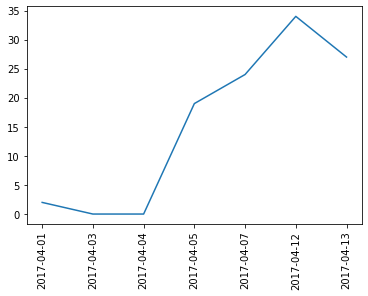

In [43]:
plt.plot(x.index , x['case_count'])
plt.xticks(rotation='vertical')
